### This Notebook created to complete the "Write a Data Science Blog Post" project for Udactiy Data scientist Nanodegree

![alt text](https://shorttermrentalz.com/wp-content/uploads/2021/02/airbnb_guide.jpg)

For this project, I was interestested in using Airbnb data from Seattle to perform analysis and work on data based on the  CRISP-DM process:

- Business Understanding
- Data Understanding
- Prepare Data
- Data Modeling
- Evaluate the Results

### Lets start by 
# **Business Understanding:**

# Airbnb: An Overview

Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that locale. It currently covers more than 100,000 cities and 220 countries worldwide. 

# Airbnb meaning – What does it stands for?
Airbnb stands for Air Bed and Breakfast, a fairly simple meaning. But what’s the Air part all about? You would think it relates to flying up in the air right? Not even close!

Back in 2007, cash strapped Joe Gebbia and Brian Chesky were living in San Francisco. Every year a design conference came to town, filling every hotel room he brink. Being savvy entrepreneurs, they thought to themselves “why not rent out our floor space in our lounge room?”.

So they went out and purchased 3 air beds. They blew them up and advertised them on their website which they called Airbed and Breakfast. A week later they had their first guests at $80 a night.

And, well, we all know what happened next, Airbnb was born!

![alt text](https://i2.wp.com/www.lifeasabutterfly.com/wp-content/uploads/how-airbnb-started-infographic.png?fit=1024%2C798&ssl=1)



### working in this datasets from Airbnb homes of Seattle, we will explore throughout this notebook the calendar and listings data homes of Seattle

Doing this exploration, we are mainly looking for answering follwing questions:


- Analyzing Hosts and their profiles
- Pricing Analysis
- Customer experience analysis

In [1]:
#import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns', 999)
import locale
plt.rcParams.update({'font.size': 18})

### Let's continue by next step of:
# Data Understanding 
## Reading data

first step, we read all necessary data from three csv source files

In [2]:
df_listings = pd.read_csv('listings.csv')
df_calendar = pd.read_csv('calendar.csv')
df_reviews = pd.read_csv('reviews.csv')

### About the Data:
- Calendar  - This file contains listing ids their availability and price on a given day
- Listings  - This contains full description of a listing along with its average review score
- Reviews  - This has data from reviews, a unique ID for each reviewer, listing_id and detailed comments

# Summary of listings
Lets have a very high-level look at the listings that we have:

In [3]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [4]:
df_listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


Working with real life data we may encounter several issues like wrong format of values, missing values and etc,. 

In order to be able to perfrom our approaches, we continue by data preparation and cleaning:
    
## Data  Preparation   

In [5]:
# chekcing price column, we can see that price formats needs to be corrected such that we can use them in numerical analysis
df_listings['price'].unique

<bound method Series.unique of 0        $85.00
1       $150.00
2       $975.00
3       $100.00
4       $450.00
         ...   
3813    $359.00
3814     $79.00
3815     $93.00
3816     $99.00
3817     $87.00
Name: price, Length: 3818, dtype: object>

In [6]:
def correct_price_format(column_name, dataset):
    """ 
    function receiving a dataframe and fixing price format
    """
    dataset[column_name] = dataset[column_name].str.replace('$','').str.replace(',','')
    
    return dataset

def correct_numeric_format(column_name, dataset):
    """
    function to convert specific column with object type and convert it to numeric
    """
    dataset[column_name] = pd.to_numeric(dataset[column_name])
    
    return dataset

In [7]:
df_listings = correct_price_format('price', df_listings)
df_listings = correct_numeric_format('price', df_listings)


In [8]:
df_listings[['id','price']].describe()

,id,price
count,3.818000e+03,3818.000000
mean,5.550111e+06,127.976166
std,2.962660e+06,90.250022
min,3.335000e+03,20.000000
25%,3.258256e+06,75.000000
50%,6.118244e+06,100.000000
75%,8.035127e+06,150.000000
max,1.034016e+07,1000.000000


In [9]:
df_listings['price'].unique

<bound method Series.unique of 0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64>

In [10]:
def remove_full_NA_columns(dataset):
    """
    Remove Columns with fully NA
    """
    missing = round(dataset.isnull().sum()/ dataset.shape[0]*100).reset_index().rename({"index":"columns",0:"missing"}, axis =1 )
    high_missing_columns = missing.loc[missing.missing ==100, "columns"]
    print("Columns to remove (Fully NAs)\n", list(high_missing_columns))
    dataset.drop(high_missing_columns,axis =1, inplace= True)
    return dataset

In [11]:
df_listings = remove_full_NA_columns(df_listings)

Columns to remove (Fully NAs)
 ['license']


#  Treating categorical values:

In order to be able to work with categorical values, we need to convert them to the proper format such that further analysis or if any modeling should required can be performed

In [12]:
def convert_categorical_fields(dataset, columns):
    """ 
    function to Convert categorical variable into dummy/indicator variables.
    input: dataset: target data set
    columns: list of categorical columsn that we want to convert
 
    """
    for col in cat_cols:
        dataset=pd.concat([dataset.drop(col, axis=1), pd.get_dummies(dataset[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
    return dataset

In [13]:
cat_cols=['neighbourhood_group_cleansed','bed_type','cancellation_policy'] # example of categorical columns
df_listings = convert_categorical_fields(df_listings, cat_cols)

In [14]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,neighbourhood_group_cleansed_Beacon Hill,neighbourhood_group_cleansed_Capitol Hill,neighbourhood_group_cleansed_Cascade,neighbourhood_group_cleansed_Central Area,neighbourhood_group_cleansed_Delridge,neighbourhood_group_cleansed_Downtown,neighbourhood_group_cleansed_Interbay,neighbourhood_group_cleansed_Lake City,neighbourhood_group_cleansed_Magnolia,neighbourhood_group_cleansed_Northgate,neighbourhood_group_cleansed_Other neighborhoods,neighbourhood_group_cleansed_Queen Anne,neighbourhood_group_cleansed_Rainier Valley,neighbourhood_group_cleansed_Seward Park,neighbourhood_group_cleansed_University District,neighbourhood_group_cleansed_West Seattle,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3818.000000,3191.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.00000,3818.000000,3818.000000,3818.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,127.976166,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.946307,2.078919,0.030906,0.148507,0.023311,0.096647,0.020691,0.138816,0.002881,0.017548,0.015977,0.020953,0.207962,0.077266,0.041645,0.011524,0.031954,0.053169,0.003405,0.019382,0.01231,0.957831,0.327658,0.371137
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,90.250022,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,5.893029,1.822348,0.173086,0.355648,0.150908,0.295516,0.142368,0.345800,0.053605,0.131320,0.125403,0.143247,0.405903,0.267047,0.199802,0.106745,0.175900,0.224400,0.058260,0.137881,0.11028,0.201000,0.469421,0.483172
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,75.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.695000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.00000

# Question 1: Analyzing hosts and their profiles

In this section, we try to analyze hosts profile by response time/rate and verification methods

## Hosts' structure

In [15]:
nb_unique_hosts = df_listings['host_id'].nunique()
nb_listings = df_listings.shape[0]
nb_superhosts = df_listings[df_listings['host_is_superhost'] == 't']['host_id'].nunique()
print("With ", nb_unique_hosts, " of unique hosts, we have in total: ", nb_listings," Listings")
print('This includes ', nb_superhosts, ' Super hosts, which is ',100* round(nb_superhosts/nb_unique_hosts,3), ' % of all hosts')

With  2751  of unique hosts, we have in total:  3818  Listings
This includes  537  Super hosts, which is  19.5  % of all hosts


# Analyzing hosts by response Times

In [16]:
response_times = (df_listings['host_response_time'].value_counts())/df_listings.shape[0]

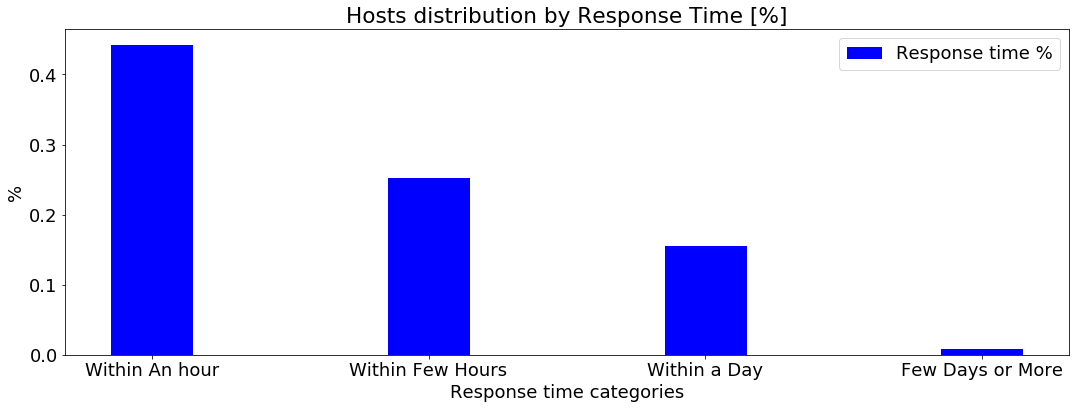

In [17]:
plt.figure(figsize=(18,6))
plt.title('Hosts distribution by Response Time [%]')
r1 = np.arange(len(response_times))

plt.bar(r1, response_times, width=0.3, color='blue', edgecolor='white', label='Response time %')

plt.xlabel('Response time categories')
plt.ylabel('%')
plt.xticks([r  for r in range(len(response_times))],['Within An hour', 'Within Few Hours', 'Within a Day','Few Days or More'])

plt.legend()
plt.show()

# Analyzing hosts by response Rate

In [18]:
response_rate = df_listings['host_response_rate'].astype(str)

for i in range(len(response_rate)):
  response_rate[i] = float(response_rate[i].strip('%'))

response_rate = response_rate.dropna()

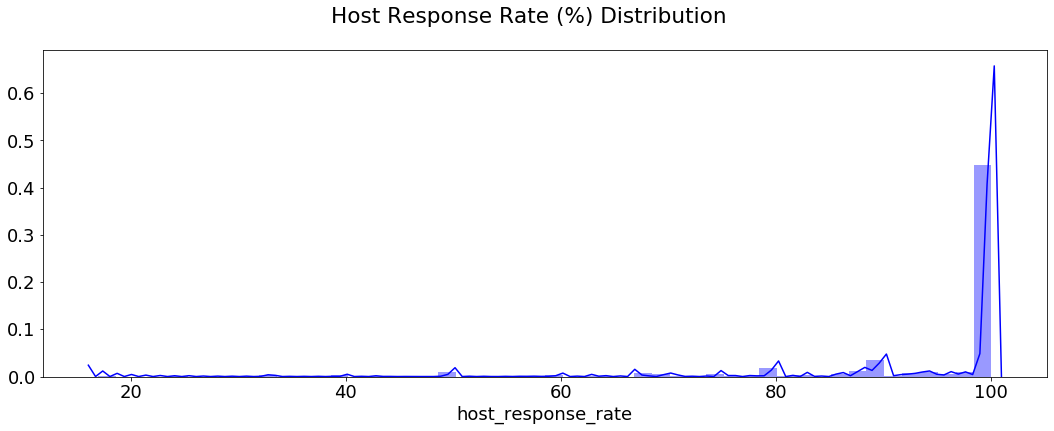

In [19]:
fig,axis = plt.subplots(1, figsize=(18,6))
plt.suptitle('Host Response Rate (%) Distribution')
plt.sca(axis)
sns.distplot(response_rate, color='blue', ax=axis)
plt.show()

# Analyzing Verification Methods

In [20]:
# Counting number of occurances
possible_values = ["email", "phone","facebook","google","jumio","kba","reviews","manual_online",
                 "manual_offline","linkedin","amex","weibo","photographer","None","sent_id" ]
verification_methods_counts = []
for val in possible_values:
  x_count = 0
    #loop through rows
  for idx in range(df_listings.shape[0]):
        #if the ed type is in the row add 1
      if val in df_listings['host_verifications'][idx]:
          x_count += 1
  verification_methods_counts.append((x_count/nb_listings)*100)

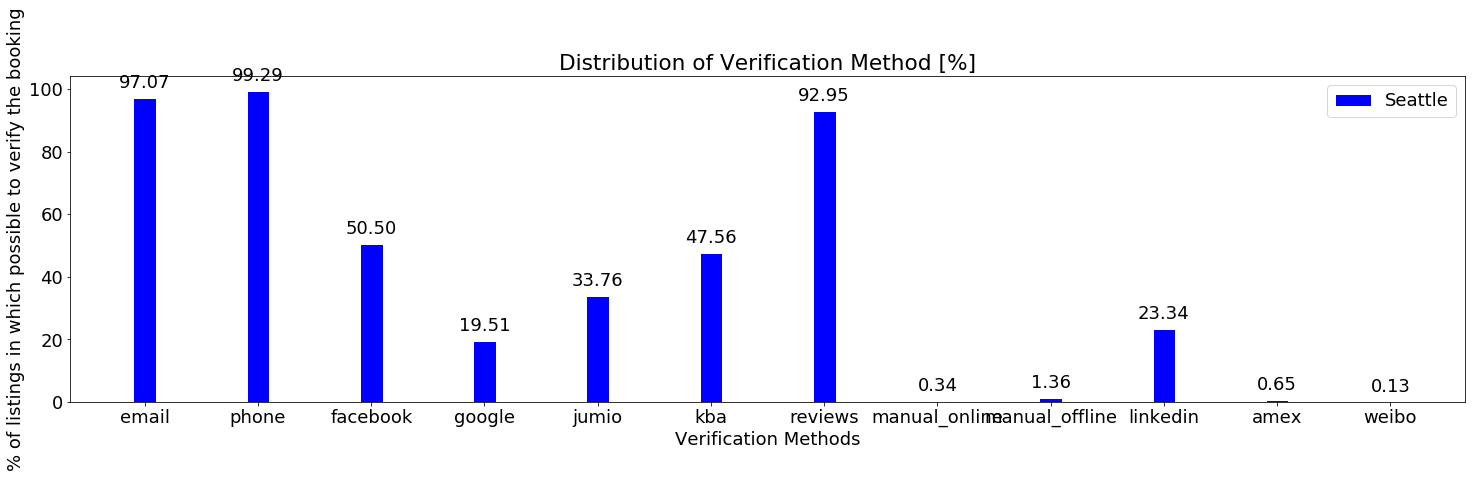

In [21]:
r1_vm = np.arange(len(verification_methods_counts[0:-3]))
r2_vm = [x for x in r1_vm]

plt.figure(figsize=(25,6))
plt.title('Distribution of Verification Method [%]')
plt.bar(r2_vm, verification_methods_counts[0:-3], width=0.2, color='blue', edgecolor='white', label='Seattle')

plt.xlabel('Verification Methods')
plt.ylabel('% of listings in which possible to verify the booking')
plt.xticks([r  for r in range(len(verification_methods_counts[0:-3]))],possible_values[0:-3])
plt.legend()

for x,y in zip(r1_vm, verification_methods_counts[0:-3]):

    label = "{:.2f}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,10), 
                 ha='center') 
plt.show()

## Let's have a look at different propert types

In [22]:
# 1- computing distribution of property types
property_types_df = (df_listings['property_type'].value_counts()/df_listings.shape[0])*100


Text(0.5, 1.0, 'Different Property types distribution')

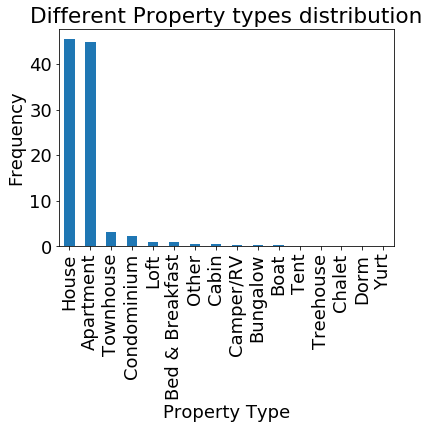

In [23]:
property_types_df.plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Property Type')
plt.title('Different Property types distribution')

In [24]:
#get list of all property types
property_types = df_listings['property_type'].unique()
property_types = [x for x in property_types if pd.notnull(x)]


## Analysis of different available room types

In [25]:
room_types = (df_listings['room_type'].value_counts()/df_listings.shape[0])*100
room_types

Entire home/apt    66.553169
Private room       30.382399
Shared room         3.064432
Name: room_type, dtype: float64

Text(0.5, 1.0, 'Different Room types distribution')

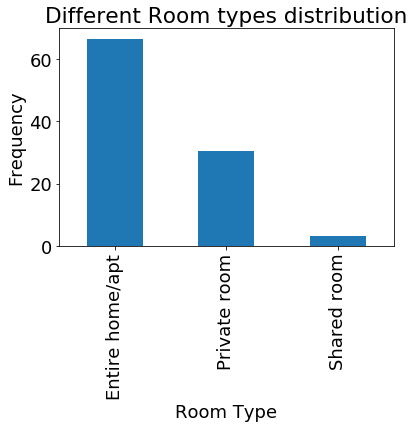

In [26]:
room_types.plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Room Type')
plt.title('Different Room types distribution')

# Question 2 - Pricing Analysis

In [27]:
df_listing_copy = df_listings.copy()

In [28]:
# Cheking if there are any null values
df_listings['price'].isnull().sum()

0

In [29]:
prices_type = df_listing_copy.groupby('property_type')['price'].mean().sort_values(ascending=False)

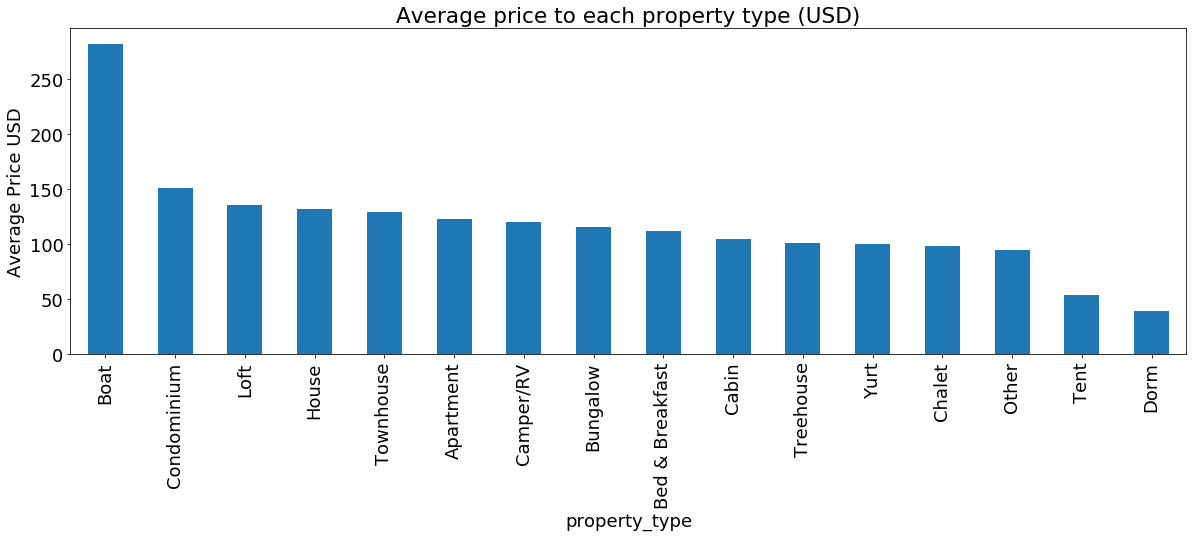

In [30]:
# Prices distribution
plt.figure(figsize=(20,6));
plt.title('Average price to each property type (USD)')
plt.xlabel('Property Type')
plt.ylabel('Average Price USD')
prices_type.plot.bar();

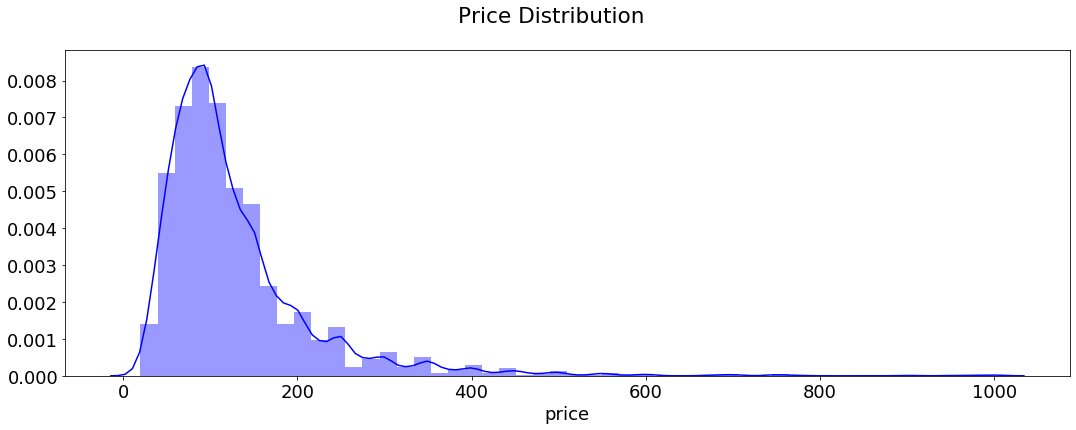

In [31]:
fig,axis = plt.subplots(1, figsize=(18,6))
plt.suptitle('Price Distribution')
plt.sca(axis)
sns.distplot(df_listing_copy['price'], color='blue', ax=axis)
plt.show()

 # Question 3: What we can understand from Guest reviews

In [32]:
scores = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
          'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']

In [33]:
# first we should check for the missing values
for val in scores:
    miising_vlues = df_listing_copy[val].isnull().mean()
    print(val, ' has ',np.round(100*miising_vlues,2),' % missing valiues')
        


review_scores_rating  has  16.95  % missing valiues
review_scores_accuracy  has  17.23  % missing valiues
review_scores_cleanliness  has  17.1  % missing valiues
review_scores_checkin  has  17.23  % missing valiues
review_scores_communication  has  17.05  % missing valiues
review_scores_location  has  17.16  % missing valiues
review_scores_value  has  17.18  % missing valiues


In [34]:
# regarding to all missing valus, we need to fill them up. 
#We do this job by replacing missing values with average of each type's score

# as it can be seen above, there are many missinig values, which if drop them, this will lead to a very shorter dataset, therefore,
# we fill the missing values with the mean of each feature

for val in scores:
  df_listing_copy[val].fillna((df_listing_copy[val].mean()), inplace=True)

In [35]:
#  computing average rate for each category
avg_rating = []
for val in scores:
    avg_rating.append(df_listing_copy[val].mean(axis=0))

In [36]:
avg_rating

[94.53926206244176,
 9.636392405063283,
 9.556398104265357,
 9.78670886075955,
 9.809598989580111,
 9.608915586468513,
 9.45224541429463]

In [37]:
# Categories of ratings

rating_cats = ['Accuracy', 'Cleanliness','Check In','Communication','Location','Value']

No handles with labels found to put in legend.


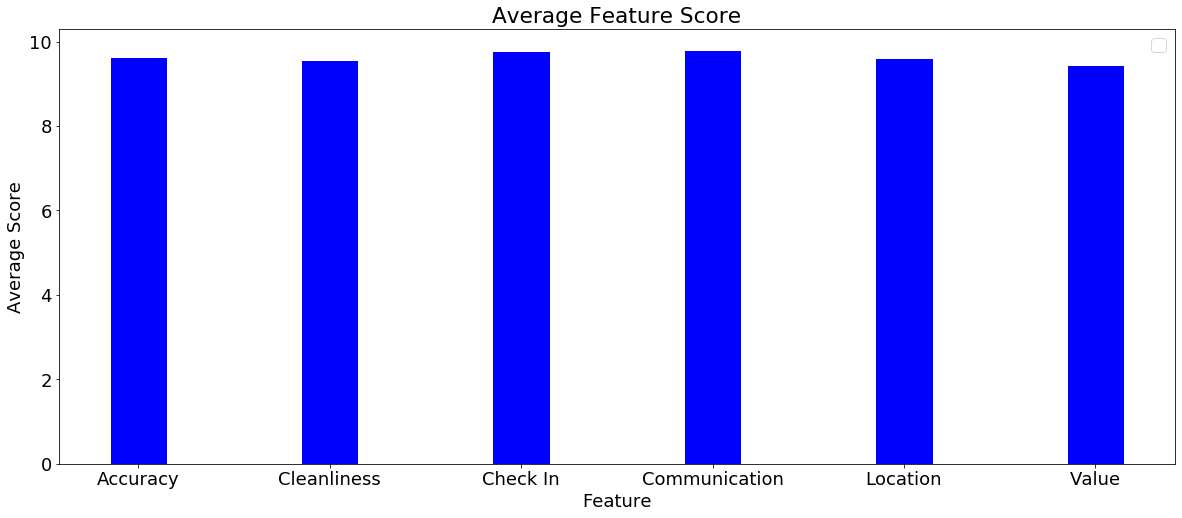

In [38]:
r1_sr = np.arange(len(avg_rating[1:7]))
r2_sr = [x  for x in r1_sr]

plt.figure(figsize=(20,8))
plt.title('Average Feature Score')
plt.bar(r1_sr, avg_rating[1:7], width=0.3, color='blue', edgecolor='white')
plt.xlabel('Feature')
plt.ylabel('Average Score')
plt.xticks([r  for r in range(len(avg_rating[1:7]))],rating_cats)

plt.legend()
plt.show()

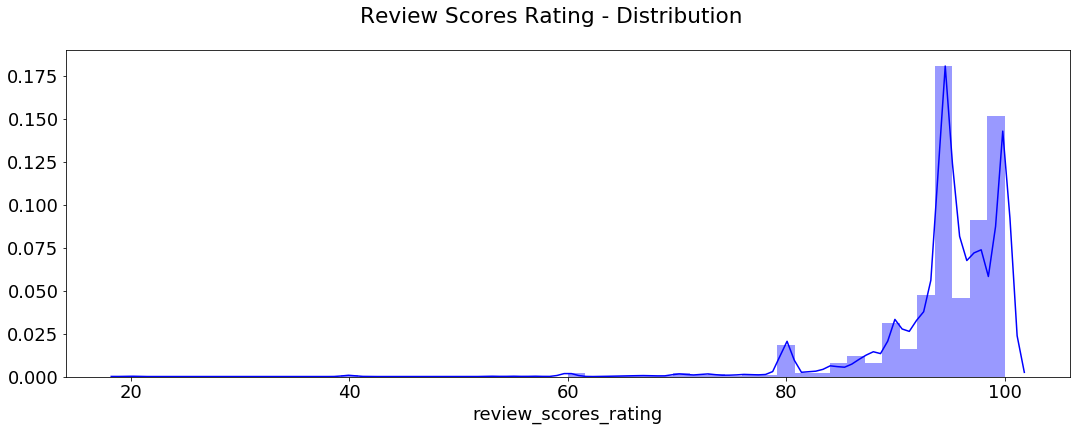

In [39]:
# observing rating score 's histogram'
fig,axis = plt.subplots(1, figsize=(18,6))
plt.suptitle('Review Scores Rating - Distribution')
plt.sca(axis)
sns.distplot(df_listing_copy['review_scores_rating'], color='blue', ax=axis)
plt.show()

In [40]:
avg_rating_propery_type = df_listing_copy.groupby('property_type')['review_scores_rating'].mean()

No handles with labels found to put in legend.


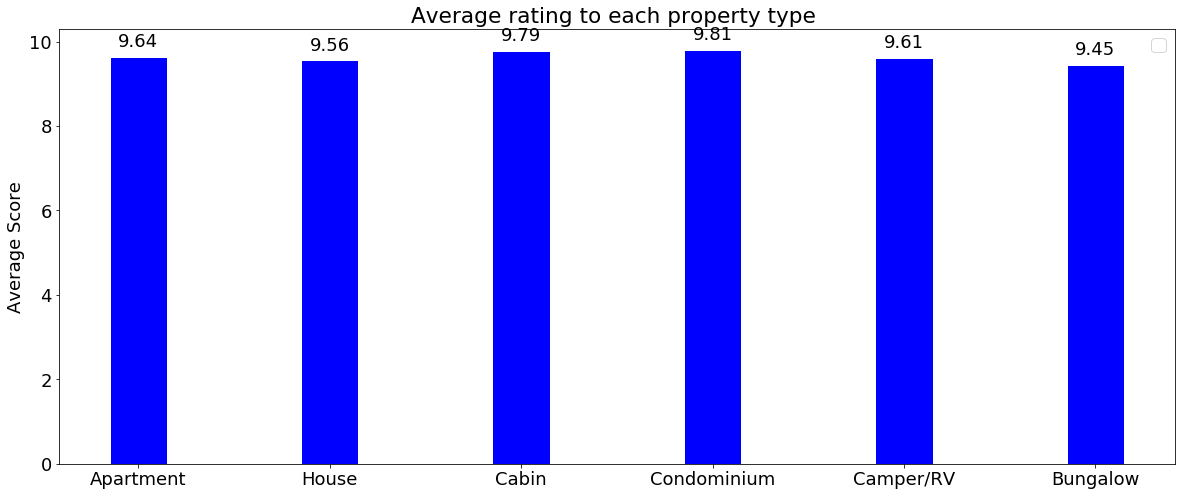

In [41]:
common_rating_property_type = []


for val in property_types:
    common_rating_property_type.append(avg_rating_propery_type[val])

r1_sr = np.arange(len(avg_rating[1:7]))
r2_sr = [x  for x in r1_sr]

plt.figure(figsize=(20,8))
plt.title('Average rating to each property type ')
plt.bar(r1_sr, avg_rating[1:7], width=0.3, color='blue', edgecolor='white')
# plt.xlabel(''Property Type')
plt.ylabel('Average Score')
plt.xticks([r  for r in range(len(property_types[1:7]))],property_types)


for x,y in zip(r1_sr, avg_rating[1:7]):

    label = "{:.2f}".format(y)

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points",
                 xytext=(0,10), 
                 ha='center') 

plt.legend()
plt.show()